In [ ]:
"""
1.first read the sequence file and convert into dictionary- species with sequence
Should I use class (?)
2.To generate the plot: 
2.1 Species' name(not for id) in plot left side
2.2 Sequence on the right side
2.3 Compare sequence (column) for the most common same one use one color
2.4 For other not the same amino acid with the most common one use other colors, each color dif
2.5 Go through each column and generate the plot
2.6 Some settings for plot
3. Under the plot,
3.1 Generate the Web Logo 
4. Split the protein sequence 
4.1 Compare Again and generate the table kind of result to show the similarity (local alignment)
"""

# -------------------------------------------------------
07/29    MSA visualization by YJ

In [ ]:
# 00: install list (terminal)


#1) pip install biopython
#1) pip install pymsaviz
#1) conda install clustalw -c bioconda
#2) which clustalw -> to get path of clustalw
#2-1) clustalw_exe = "/home/yeongjun.kim/anaconda3/envs/ASMSA/bin/clustalw"  # ClustalW file path

In [1]:
import os
from Bio.Align.Applications import ClustalwCommandline
from Bio import AlignIO
from pymsaviz import MsaViz, get_msa_testdata

/home/yeongjun.kim/anaconda3/envs/ASMSA/lib/python3.12/site-packages/Bio/Application/__init__.py:39: BiopythonDeprecationWarning: The Bio.Application modules and modules relying on it have been deprecated.

Due to the on going maintenance burden of keeping command line application
wrappers up to date, we have decided to deprecate and eventually remove these
modules.

We instead now recommend building your command line and invoking it directly
with the subprocess module.
  warnings.warn(


In [2]:
# 0: set working directory

Work_dir = "/data-22t/yeongjun.kim/0.Project/16_Organoid_pathway_across_species/function_aa_prediction"
os.chdir(Work_dir)

In [3]:
# 1: make MSA file from fasta file



# input_file
input_file = "wnt3a.fasta"
output_file = "wnt3a.aln"

## change this
clustalw_exe = "/home/yeongjun.kim/anaconda3/envs/ASMSA/bin/clustalw"  # ClustalW file path

# ClustalW command
clustalw_cline = ClustalwCommandline(clustalw_exe, infile=input_file, outfile=output_file)
assert os.path.isfile(clustalw_exe), "ClustalW executable not found"

# ClustalW
stdout, stderr = clustalw_cline()

# read result file
alignment = AlignIO.read(output_file, "clustal")

# print alignment result
print(alignment)


Alignment with 12 rows and 430 columns
MAPLGYLLVLCS-----------LKQALGSYPIWWS--------...--- Mus_musculus
MAPLGYLLVLCS-----------LKQALGSYPIWWS--------...--- Rattus_norvegicus
MAPLGYFLLLCS-----------LKQALGSYPIWWS--------...--- Homo_sapiens
MAPLGYFLLLCS-----------LKQALGSYPIWWS--------...RER Pan_troglodytes
MAPLGYFLLLCS-----------LKQALGSYPIWWS--------...--- Macaca_mulatta
MAPLGYFMFLYG-----------LKQALGSYPIWWS--------...--- Ovis_aries
MAPLGYFIFLYG-----------LKQALGNYPIWWS--------...--- Bos_taurus
MAPLGYFIFLYG-----------LKQALGSYPIWWS--------...--- Sus_scrofa
MAPLGYFLFLCG-----------LKQALGSYPIWWS--------...--- Equus_caballus
MKSFCSEVVAKSRLGLKQWGWCGWTPMGSAWKKWISEQRSLLEL...--- Gallus_gallus
MGCFGYLLLIIG-----------LHQVLATYPIWWS--------...--- Xenopus_laevis
MIYLGYFLFLFCG----------LTRVMASYPIWWS--------...--- Danio_rerio


In [4]:
# 2: get adjusted amino acid position



def get_amino_acid_position(alignment, sequence_id, positions):
    
    for record in alignment:
        if record.id == sequence_id:
            original_sequence = str(record.seq)
            break
    else:
        raise ValueError(f"Sequence ID {sequence_id} not found in the MSA file.")
    position_result = list()
    amino_acid_result = list()
    for position in positions:
        count_non_gap = 0
        adjusted_position = 0
        while count_non_gap < position:
            if original_sequence[adjusted_position] != "-":
                count_non_gap +=1
            adjusted_position += 1            

        amino_acid = original_sequence[adjusted_position - 1]
        
        position_result.append(adjusted_position)
        amino_acid_result.append(amino_acid)
    return position_result, amino_acid_result


# Load aln file
aln_file = "wnt3a.aln"
alignment = AlignIO.read(aln_file, "clustal")

# humans name
sequence_id = "Homo_sapiens" 

# interested positions
position = [331]  

adjusted_position, amino_acid = get_amino_acid_position(alignment, sequence_id, position)
print(f"Adjusted position: {adjusted_position}, Amino acid: {amino_acid}")


Adjusted position: [367], Amino acid: ['F']


In [5]:
# example

entropy_positions = [1,5 , 6 ,24 ,38 ,48 ,77 ,78 ,95 ,109 ,126 ,135 ,136 ,137 ,142 ,185 ,194 ,208 ,213 ,217 ,230 ,237 ,285]

adjusted_positions = get_amino_acid_position(alignment, sequence_id, entropy_positions)[0]
adjusted_positions

[1,
 5,
 6,
 35,
 62,
 72,
 101,
 102,
 119,
 145,
 162,
 171,
 172,
 173,
 178,
 221,
 230,
 244,
 249,
 253,
 266,
 273,
 321]

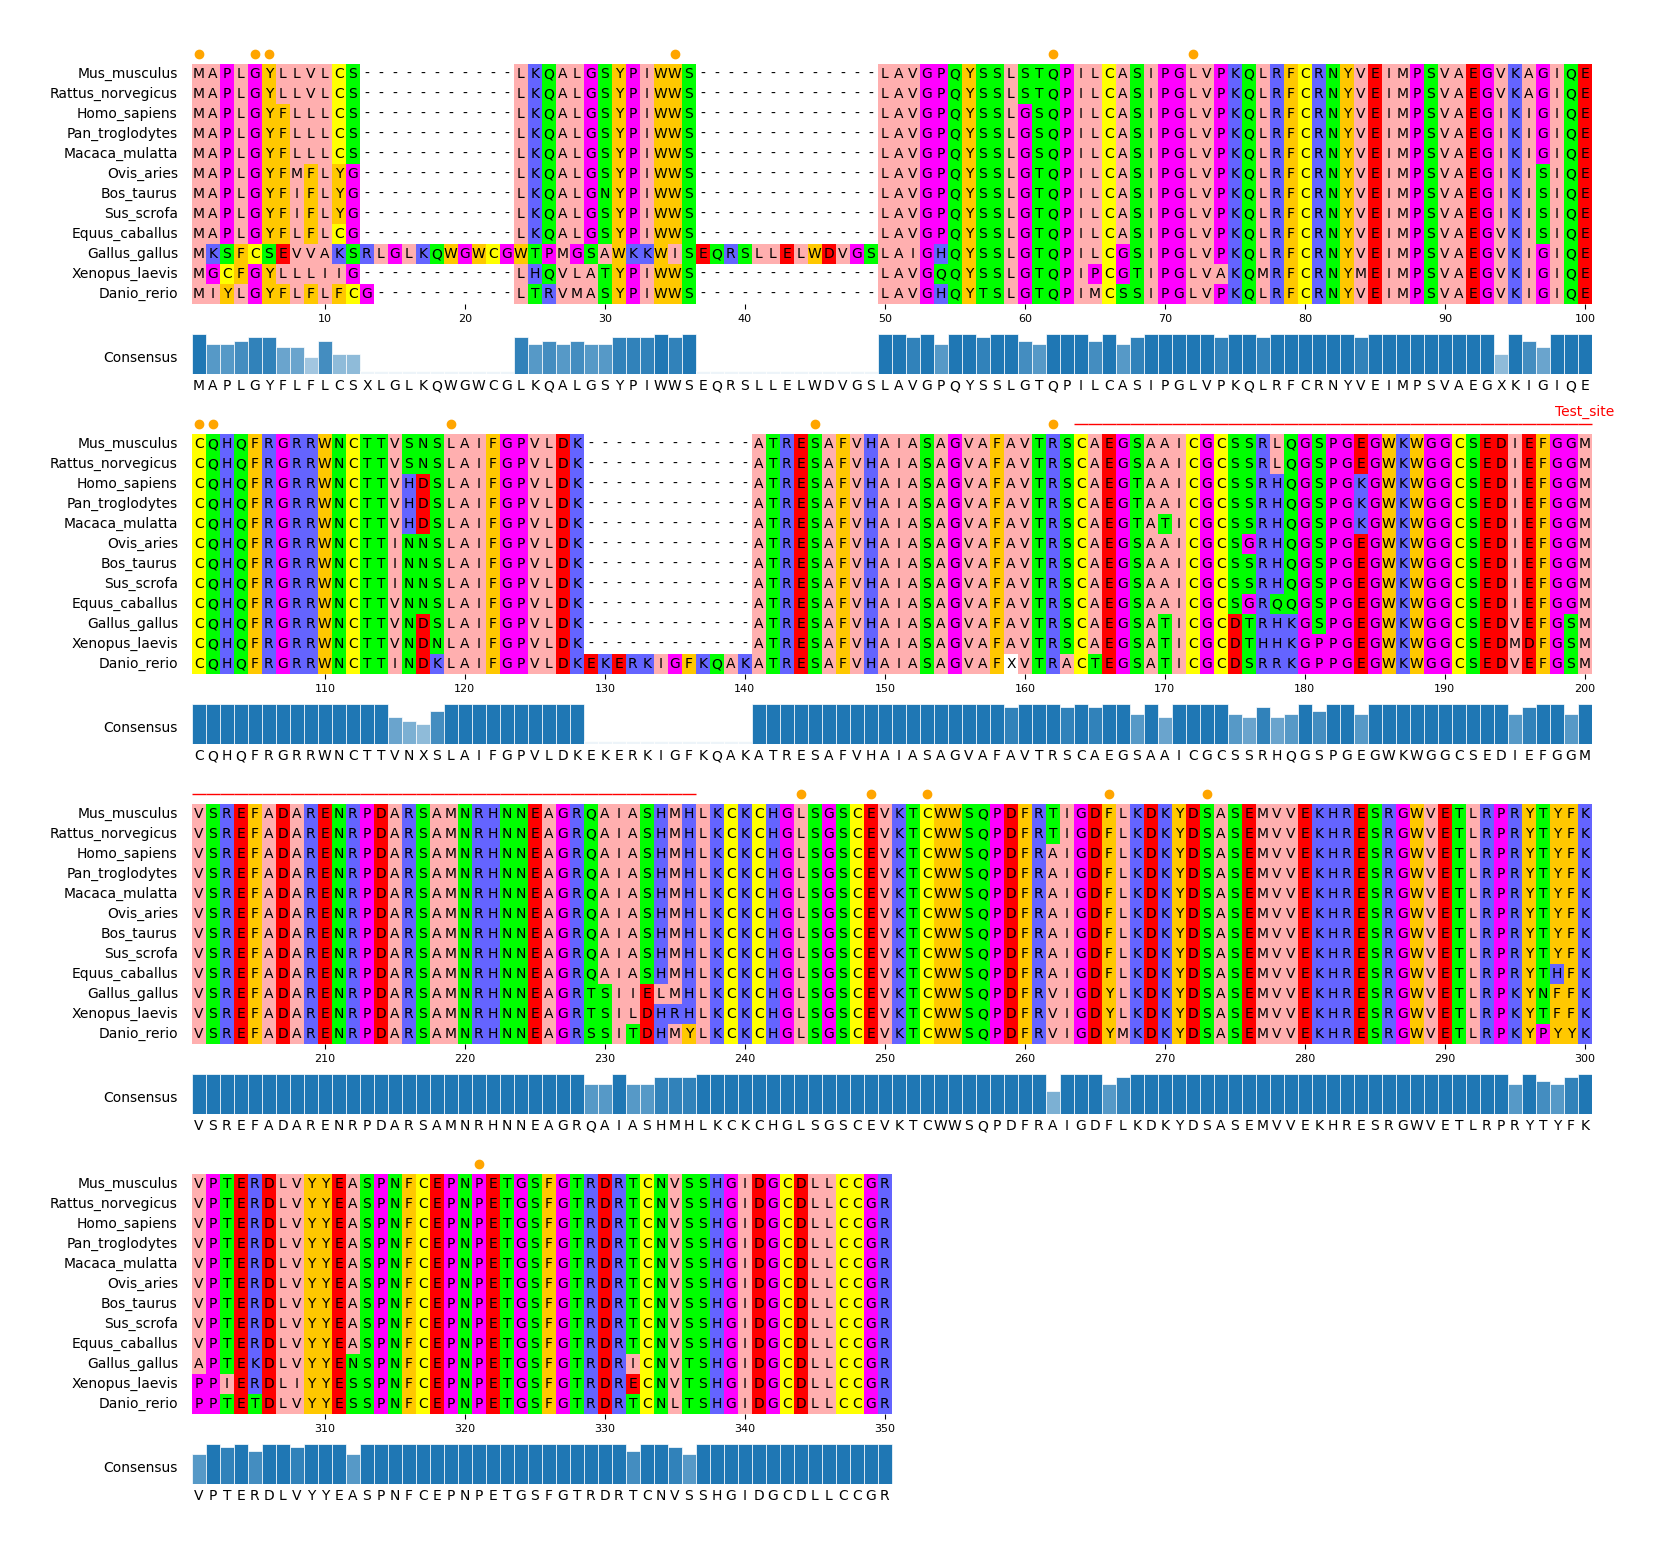

In [6]:
## 3: MSA result visualization

# make basic MSA visualiation figure
alignment = AlignIO.read("wnt3a.aln", "clustal")
mv = MsaViz(alignment,start=1, end= 350, wrap_length=100, show_consensus=True)

## parameters (MsaViz)
# wrap_length       amino_acid count for one line
# show_consensus    showing bottom consensus line
# start             Set the start position to visualize
# end               Set the end position to visualize



# Add markers (adjusted positions)
mv.add_markers(adjusted_positions, color="orange", marker="o")

## parameters (add_markers)
# color             color of the position (orange, green, blue ... )
# marker            Shape of the position (o, +, x ...)



start_pos = [128]
end_pos = [200]
adjusted_start_pos = get_amino_acid_position(alignment, sequence_id, start_pos)[0]
adjusted_end_pos = get_amino_acid_position(alignment, sequence_id, end_pos)[0]

# # Add text annotations
mv.add_text_annotation(adjusted_start_pos + adjusted_end_pos, "Test_site", text_color="red", range_color="red")

## parameters (add_text_annotation)
# input postion     start_position + end_position ## output is list type -> so just add this// 
#                   if u want to input just position, input must be [123,150]
# annotation text   Text contents
# colors            Easy


## saving figure
mv.savefig("test_wnt3a.png")

## visualization in vscode
from IPython.display import Image, display
display(Image(filename="test_wnt3a.png"))

In [ ]:
from Bio import AlignIO

# Load the alignment
alignment = AlignIO.read("wnt3a.aln", "clustal")

# Convert and save to custom format
with open("converted_alignment.a2m", "w") as output_handle:
    for record in alignment:
        output_handle.write(f">{record.id}\n")
        sequence = str(record.seq)
        # Add custom logic if needed, here we just print the sequence as is
        output_handle.write(f"{sequence}\n")

-------------------------------------------------------

In [1]:
# 1.first read the sequence file and convert into dictionary- species with sequence
my_dict = {}

f = open("wnt3a.fasta","r")
def read_file_into_dic (filename):
    
    lines = f.readlines()
    for line in lines:
        if line.startswith(">"):
            spec_name_only = line.split('[')[-1].split(']')[0].strip()
            sequences = ''
        else:
            sequences += line.strip()
            my_dict[spec_name_only] = sequences
    return my_dict
read_file_into_dic(f)

    

{'Mus musculus': 'MAPLGYLLVLCSLKQALGSYPIWWSLAVGPQYSSLSTQPILCASIPGLVPKQLRFCRNYVEIMPSVAEGVKAGIQECQHQFRGRRWNCTTVSNSLAIFGPVLDKATRESAFVHAIASAGVAFAVTRSCAEGSAAICGCSSRLQGSPGEGWKWGGCSEDIEFGGMVSREFADARENRPDARSAMNRHNNEAGRQAIASHMHLKCKCHGLSGSCEVKTCWWSQPDFRTIGDFLKDKYDSASEMVVEKHRESRGWVETLRPRYTYFKVPTERDLVYYEASPNFCEPNPETGSFGTRDRTCNVSSHGIDGCDLLCCGRGHNARTERRREKCHCVFHWCCYVSCQECTRVYDVHTCK',
 'Homo sapiens': 'MAPLGYFLLLCSLKQALGSYPIWWSLAVGPQYSSLGSQPILCASIPGLVPKQLRFCRNYVEIMPSVAEGIKIGIQECQHQFRGRRWNCTTVHDSLAIFGPVLDKATRESAFVHAIASAGVAFAVTRSCAEGTAAICGCSSRHQGSPGKGWKWGGCSEDIEFGGMVSREFADARENRPDARSAMNRHNNEAGRQAIASHMHLKCKCHGLSGSCEVKTCWWSQPDFRAIGDFLKDKYDSASEMVVEKHRESRGWVETLRPRYTYFKVPTERDLVYYEASPNFCEPNPETGSFGTRDRTCNVSSHGIDGCDLLCCGRGHNARAERRREKCRCVFHWCCYVSCQECTRVYDVHTCK',
 'Rattus norvegicus': 'MAPLGYLLVLCSLKQALGSYPIWWSLAVGPQYSSLSTQPILCASIPGLVPKQLRFCRNYVEIMPSVAEGVKAGIQECQHQFRGRRWNCTTVSNSLAIFGPVLDKATRESAFVHAIASAGVAFAVTRSCAEGSAAICGCSSRLQGSPGEGWKWGGCSEDIEFGGMVSREFADARENRPDARSAMNRHNNEAGRQAIASHMHLKCKCHGLSGSCEVKTCWWSQPDFRTIGDFL

In [2]:
extracted_sequences = {species: sequence[28:150] for species, sequence in my_dict.items()}
extracted_sequences

{'Mus musculus': 'GPQYSSLSTQPILCASIPGLVPKQLRFCRNYVEIMPSVAEGVKAGIQECQHQFRGRRWNCTTVSNSLAIFGPVLDKATRESAFVHAIASAGVAFAVTRSCAEGSAAICGCSSRLQGSPGEGW',
 'Homo sapiens': 'GPQYSSLGSQPILCASIPGLVPKQLRFCRNYVEIMPSVAEGIKIGIQECQHQFRGRRWNCTTVHDSLAIFGPVLDKATRESAFVHAIASAGVAFAVTRSCAEGTAAICGCSSRHQGSPGKGW',
 'Rattus norvegicus': 'GPQYSSLSTQPILCASIPGLVPKQLRFCRNYVEIMPSVAEGVKAGIQECQHQFRGRRWNCTTVSNSLAIFGPVLDKATRESAFVHAIASAGVAFAVTRSCAEGSAAICGCSSRLQGSPGEGW',
 'Danio rerio': 'VGHQYTSLGTQPIMCSSIPGLVPKQLRFCRNYVEIMPSVAEGVKIGIQECQHQFRGRRWNCTTINDKLAIFGPVLDKEKERKIGFKQAKATRESAFVHAIASAGVAFXVTRACTEGSATICG',
 'Gallus gallus': 'SAWKKWISEQRSLLELWDVGSLAIGHQYSSLGTQPILCGSIPGLVPKQLRFCRNYVEIMPSVAEGVKIGIQECQHQFRGRRWNCTTVNDSLAIFGPVLDKATRESAFVHAIASAGVAFAVTR',
 'Xenopus laevis': 'GQQYSSLGTQPIPCGTIPGLVAKQMRFCRNYMEIMPSVAEGVKIGIQECQHQFRGRRWNCTTVNDNLAIFGPVLDKATRESAFVHAIASAGVAFAVTRSCAEGSATICGCDTHHKGPPGEGW',
 'Ovis aries': 'GPQYSSLGTQPILCASIPGLVPKQLRFCRNYVEIMPSVAEGIKISIQECQHQFRGRRWNCTTINNSLAIFGPVLDKATRESAFVHAIASAGVAFAVTRSCAEGSAAICGCSGRHQGSPG

In [8]:
values = list(extracted_sequences.values())
print(values)
type(values)
# value is a list, list has two strings rn

    # seq1=values[0]
    # seq1 is whole string
    # seq2=values[1]
    # seq2 is whole string
    
aminoacid_list = [list(seq) for seq in values]
print(aminoacid_list[0][2])


    



['GPQYSSLSTQPILCASIPGLVPKQLRFCRNYVEIMPSVAEGVKAGIQECQHQFRGRRWNCTTVSNSLAIFGPVLDKATRESAFVHAIASAGVAFAVTRSCAEGSAAICGCSSRLQGSPGEGW', 'GPQYSSLGSQPILCASIPGLVPKQLRFCRNYVEIMPSVAEGIKIGIQECQHQFRGRRWNCTTVHDSLAIFGPVLDKATRESAFVHAIASAGVAFAVTRSCAEGTAAICGCSSRHQGSPGKGW', 'GPQYSSLSTQPILCASIPGLVPKQLRFCRNYVEIMPSVAEGVKAGIQECQHQFRGRRWNCTTVSNSLAIFGPVLDKATRESAFVHAIASAGVAFAVTRSCAEGSAAICGCSSRLQGSPGEGW', 'VGHQYTSLGTQPIMCSSIPGLVPKQLRFCRNYVEIMPSVAEGVKIGIQECQHQFRGRRWNCTTINDKLAIFGPVLDKEKERKIGFKQAKATRESAFVHAIASAGVAFXVTRACTEGSATICG', 'SAWKKWISEQRSLLELWDVGSLAIGHQYSSLGTQPILCGSIPGLVPKQLRFCRNYVEIMPSVAEGVKIGIQECQHQFRGRRWNCTTVNDSLAIFGPVLDKATRESAFVHAIASAGVAFAVTR', 'GQQYSSLGTQPIPCGTIPGLVAKQMRFCRNYMEIMPSVAEGVKIGIQECQHQFRGRRWNCTTVNDNLAIFGPVLDKATRESAFVHAIASAGVAFAVTRSCAEGSATICGCDTHHKGPPGEGW', 'GPQYSSLGTQPILCASIPGLVPKQLRFCRNYVEIMPSVAEGIKISIQECQHQFRGRRWNCTTINNSLAIFGPVLDKATRESAFVHAIASAGVAFAVTRSCAEGSAAICGCSGRHQGSPGEGW', 'GPQYSSLGTQPILCASIPGLVPKQLRFCRNYVEIMPSVAEGIKISIQECQHQFRGRRWNCTTINNSLAIFGPVLDKATRESAFVHAIASAGVAFAVTRSCAEGSAAICGCSSRHQG

In [11]:
import matplotlib.pyplot as plt
import numpy as np


aa_to_color = {
    'A': '#FF0000',  
    'C': '#00FF00',  
    'D': '#0000FF',  
    'E': '#FFFF00',  
    'F': '#FF00FF',  
    'G': '#00FFFF',  
    'H': '#800000',  
    'I': '#808000',  
    'K': '#008000',  
    'L': '#800080',  
    'M': '#008080',  
    'N': '#000080',  
    'P': '#FFA500',  
    'Q': '#A52A2A', 
    'R': '#808080',  
    'S': '#C0C0C0',  
    'T': '#FFFFFF',  
    'V': '#000000', 
    'W': '#FF6347',
    'X': '#FF6347',  
    'Y': '#4682B4',  
    '-': '#D3D3D3',  
}


aa_matrix = np.array(amino_acid_list)
color_matrix = np.array([[aa_to_color[aa] for aa in seq] for seq in amino_acid_list])


fig, ax = plt.subplots(figsize=(len(aminoacid_list[0]) * 2, len(amino_acid_list) * 2))


for i in range(len(aminoacid_list)):
    for j in range(len(aminoacid_list[0])):
        ax.add_patch(plt.Rectangle((j, i), 1, 1, color=color_matrix[i][j]))
        ax.text(j + 0.5, i + 0.5, aa_matrix[i, j], ha='center', va='center', fontsize=6)


ax.set_yticks(np.arange(len(aminoacid_list)) + 0.5)
ax.set_yticklabels([f'Seq {i+1}' for i in range(len(aminoacid_list))], fontsize=10)


ax.set_xticks(np.arange(len(aminoacid_list[0])) + 0.5)
ax.set_xticklabels(np.arange(1, len(aminoacid_list[0]) + 1), fontsize=6)


ax.set_xlim(0, len(aminoacid_list[0]))
ax.set_ylim(0, len(aminoacid_list))


ax.set_xlabel('Position')
ax.set_ylabel('Sequence')
plt.title('MSA Visualization')


ax.tick_params(left=False, bottom=False, labelleft=True, labelbottom=True)
ax.grid(False)


plt.tight_layout()


plt.show()
